In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn import metrics

In [2]:
df_1=pd.read_csv('C:\\Users\\elava\\Downloads\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df_2=pd.read_csv("C:\\Users\\elava\\Downloads\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_3=pd.read_csv("C:\\Users\\elava\\Downloads\\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_4=pd.read_csv("C:\\Users\\elava\\Downloads\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_5=pd.read_csv("C:\\Users\\elava\\Downloads\\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")


In [5]:
# merging all the datasets
merged_df = pd.concat([df_1 , df_2 , df_3, df_4, df_5], ignore_index=True)

In [6]:
merged_df['remaining_lease'].fillna('0',inplace = True)

In [7]:
merged_df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [8]:
# Converting the block column to int
merged_df['block'] = merged_df['block'].astype(str)
merged_df['block'] = merged_df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [9]:
merged_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,0
...,...,...,...,...,...,...,...,...,...,...,...
921673,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,0
921674,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,0
921675,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,0
921676,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,0


In [10]:
#splitting month column to year and month
merged_df['reg_year'] = merged_df['month'].apply(lambda x: int(x.split('-')[0]))
merged_df['reg_month'] = merged_df['month'].apply(lambda x: int(x.split('-')[1]))

In [11]:
merged_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,0,2012,3
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,0,2012,3
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,0,2012,3
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,0,2012,3
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,0,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
921673,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,0,2012,2
921674,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,0,2012,2
921675,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,0,2012,2
921676,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,0,2012,2


          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           1
7  MULTI-GENERATION           1


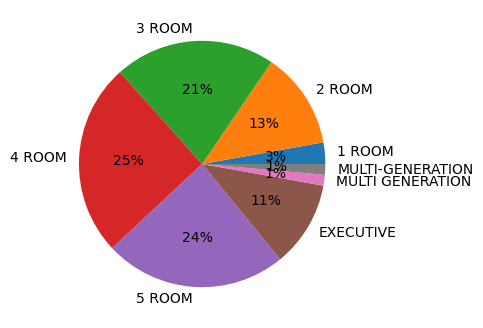

In [12]:
temp = pd.DataFrame(merged_df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

<Axes: title={'center': 'floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

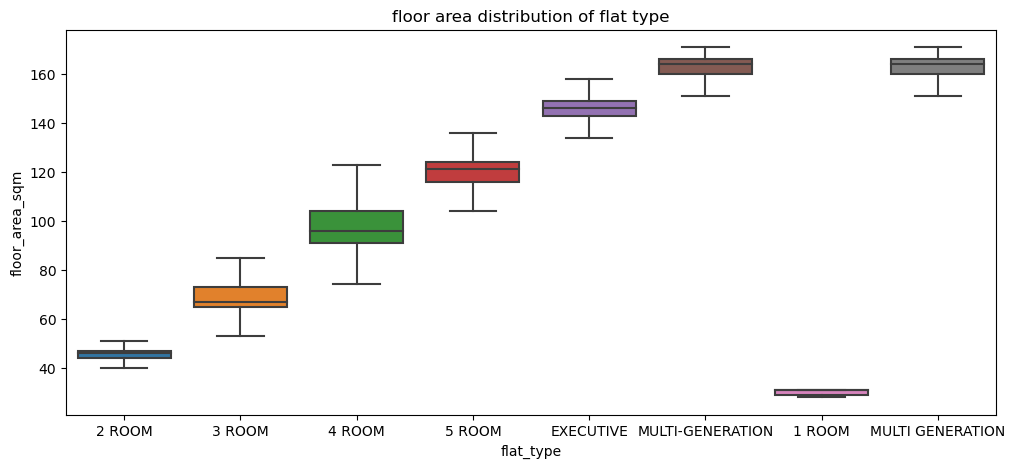

In [13]:
import seaborn as sns


plt.figure(figsize = (12,5))
plt.title('floor area distribution of flat type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = merged_df, showfliers = False)

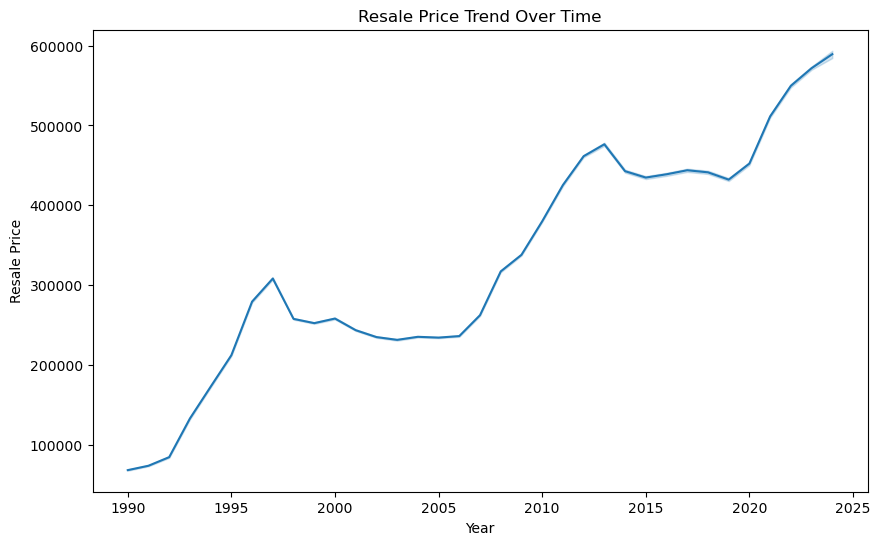

In [14]:
merged_df['lease_commence_date'] = merged_df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=merged_df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [15]:
# Use LabelEncoder to convert 'street_name','flat_model' ,'flat_type' ,'town' to numeric
label_encoder = LabelEncoder()
merged_df['street_name'] = label_encoder.fit_transform(merged_df['street_name'])
merged_df['flat_type'] = label_encoder.fit_transform(merged_df['flat_type'])
merged_df['flat_model'] = label_encoder.fit_transform(merged_df['flat_model'])
merged_df['town'] = label_encoder.fit_transform(merged_df['town'])
merged_df['storey_range'] = label_encoder.fit_transform(merged_df['storey_range'])

In [16]:
merged_df.drop(columns='month', inplace=True)

In [17]:
merged_df.drop("remaining_lease",inplace = True , axis = 1)

<Axes: title={'center': 'Correlation Matrix'}>

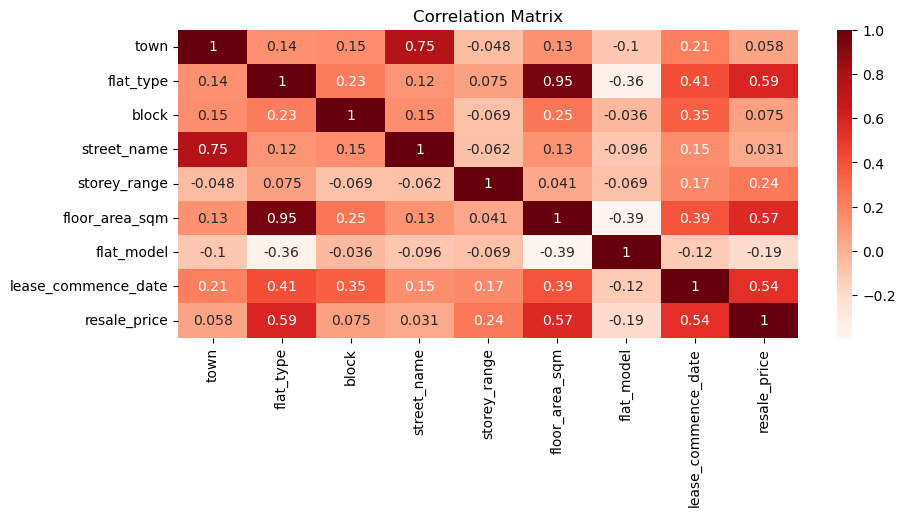

In [18]:
feature_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range','floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'resale_price']
plt.figure(figsize = (10,4))
plt.title('Correlation Matrix')
sns.heatmap(merged_df[feature_cols].corr(),cmap="Reds", annot = True)

In [19]:
# Split the data into features and target
x = merged_df[['town','flat_type','block','street_name','storey_range','storey_range','flat_model','lease_commence_date','reg_year','reg_month']]
y = merged_df['resale_price']

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 61215.191762753064
MSE = 6752265434.375389
RMSE  = 82172.16946372652
R2 Score = 0.7631443184154614


In [22]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 20298.50428978529
MAE is - 938037774.6415142
RMSE is - 30627.402348901778
R2 Score is - 0.9670955505786759


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=10)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 32928.372608050646
MAE is - 2308795128.5181885
RMSE is - 48049.92329357237
Accuracy Score is - 0.9190121820418596


In [24]:
import pickle

In [25]:
with open ('dt.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)